In [432]:
import math
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display,clear_output
import IPython.display
import random
import os

class cell:
    def __init__(self,mazesize,GridPos,padding=40,cellsize=30,top=True,left=True,right=True,bottom=True,celltype="regular"):
        self.cellsize = cellsize
        self.celltype = celltype
        self.grid_directions = {(0,-1):"top",(0,1):"bottom",(-1,0):"left",(1,0):"right"}
        self.directions = {"top":top,"bottom":bottom,"left":left,"right":right}
        self.mazesize = mazesize
        self.GridPos = GridPos
        self.rect = ((GridPos[0]*cellsize-cellsize/2,GridPos[1]*cellsize-cellsize/2),(GridPos[0]*cellsize+cellsize/2,GridPos[1]*cellsize+cellsize/2))
        self.rect = ((int(self.rect[0][0]+padding),int(self.rect[0][1]+padding)),(int(self.rect[1][0]+padding),int(self.rect[1][1]+padding)))
        self.visited = 0

    def GetNeighbours(self):
        Neighbours = []
        if self.GridPos[0]-1 > -1:
            Neighbours.append( (self.GridPos[0]-1,self.GridPos[1]) )
        if self.GridPos[0]+1 < self.mazesize:
            Neighbours.append( (self.GridPos[0]+1,self.GridPos[1]) )
        if self.GridPos[1]-1 > -1:
            Neighbours.append( (self.GridPos[0],self.GridPos[1]-1) )
        if self.GridPos[1]+1 < self.mazesize:
            Neighbours.append( (self.GridPos[0],self.GridPos[1]+1) )

        #print(self.GridPos," ",Neighbours)
        return Neighbours

    def ClearPassageWith(self,neighbourcell):
        oposite_direction = {"top":"bottom","bottom":"top","left":"right","right":"left"}
        d_str = self.grid_directions [(neighbourcell.GridPos[0]-self.GridPos[0],neighbourcell.GridPos[1]-self.GridPos[1])]
        #print(d_str)
        self.directions[d_str] = False
        neighbourcell.directions[oposite_direction[d_str]]= False
        
    def CheckPassageBlockedWith(self,neighbourcell):
        grid_dir = (neighbourcell.GridPos[0]-self.GridPos[0],neighbourcell.GridPos[1]-self.GridPos[1])
        passage_blocked = self.directions[self.grid_directions[grid_dir]]
        return passage_blocked

class maze:
    def __init__(self,mazesize = 10,imagesize = 40,padding=50,start_pos=(0,0)):
        self.mazesize = mazesize
        self.padding = padding
        self.imagesize = imagesize
        self.cellsize = ((imagesize[0]/2)/mazesize)*0.8
        self.mouse_pos = (0,0)
        self.mouse_dir = 1
        self.mazecells = []
        self.breadcrumbs = []
        self.start_pos = start_pos
        self.end_pos = (mazesize-1,mazesize-1)
        self.end_cell = None
        self.start_cell = None
        for i in range(self.mazesize):
            self.mazecells.append([])
            for j in range(self.mazesize):
                self.mazecells[i].append(cell(self.mazesize,(i,j),cellsize=self.cellsize,padding=self.padding)) 
        #self.mazecells[3][3].directions = {"top":True,"bottom":True,"left":True,"right":True}
        self.set_endcell(self.end_pos)
        self.set_startcell(self.start_pos)
    
    def clear_visits(self):
        for i in range(self.mazesize):
            for j in range(self.mazesize):
                self.mazecells[i][j].visited = 0

    def reset(self):
        self.mouse_pos = (0,0)
        self.mouse_dir = 1
        self.clear_visits()
        
    def draw_mouse(self,draw_obj):
        #self.mouse_pos
        #self.mouse_dir 
        mic_c = ((self.mouse_pos[0]*self.cellsize)-(self.cellsize/2)+self.padding,(self.mouse_pos[1]*self.cellsize)-(self.cellsize/2)+self.padding)
        mic_c = (mic_c[0]+self.cellsize/2,mic_c[1]+self.cellsize/2)
        polygon_coords = None 
        
        if self.mouse_dir == 0:
            polygon_coords   = [(mic_c[0]-10,mic_c[1]+12),(mic_c[0]+10,mic_c[1]+12),(mic_c[0],mic_c[1]-15)]
        elif self.mouse_dir == 1:
            polygon_coords   = [(mic_c[0]-10,mic_c[1]-12),(mic_c[0]+10,mic_c[1]-12),(mic_c[0],mic_c[1]+15)]
        elif self.mouse_dir == 2:
            polygon_coords   = [(mic_c[0]-15,mic_c[1]),(mic_c[0]+12,mic_c[1]-10),(mic_c[0]+12,mic_c[1]+10)]
        elif self.mouse_dir == 3:
            polygon_coords   = [(mic_c[0]+15,mic_c[1]),(mic_c[0]-12,mic_c[1]-10),(mic_c[0]-12,mic_c[1]+10)]
        #polygon_coords_right =
        draw_obj.polygon( polygon_coords, fill ="darkslategray") 

    def get_mouse_inputs(self):
        mx = self.mouse_pos[0]
        my = self.mouse_pos[1]
        walls = self.mazecells[mx][my].directions
        inputs = walls
        inputs["mouse_dir"] = self.mouse_dir
        return inputs
        
    def draw(self,draw_obj):
        wallcolor = (166, 217, 255)
        celloutline = (86, 86, 86 )
        for row in self.mazecells:
            for cell in row:
                if cell.celltype == "regular":
                    draw_obj.rectangle(cell.rect, fill="gray",outline=celloutline)
                elif cell.celltype == "end":
                    draw_obj.rectangle(cell.rect, fill="Goldenrod",outline=celloutline)
                elif cell.celltype == "start": 
                    draw_obj.rectangle(cell.rect, fill=(126, 161, 137),outline=celloutline)
        for row in self.mazecells:
            for cell in row:
                if cell.directions['top']:
                    draw_obj.line((cell.rect[0],(cell.rect[1][0],cell.rect[0][1])), fill=wallcolor, width=3)
                if cell.directions['bottom']:
                    draw_obj.line(((cell.rect[0][0],cell.rect[1][1]),cell.rect[1]), fill=wallcolor, width=3)
                if cell.directions['left']:
                    draw_obj.line((cell.rect[0],(cell.rect[0][0],cell.rect[1][1])), fill=wallcolor, width=3)
                if cell.directions['right']:
                    draw_obj.line(((cell.rect[1][0],cell.rect[0][1]),cell.rect[1]), fill=wallcolor, width=3)
        #Maze stats
        self.draw_mouse(draw_obj)

    def printmaze(self):
        #clear_output(wait=True)
        img = Image.new("RGB", self.imagesize)
        drw = ImageDraw.Draw(img)
        self.draw(drw)
        img.save("img.png")
        pil_img = IPython.display.Image(filename="img.png")
        display(pil_img)

    def set_endcell(self,pos):
        if self.end_cell != None:
            self.end_cell.celltype = "regular"
        self.end_cell = self.mazecells[pos[0]][pos[1]]
        self.end_cell.celltype = "end"
        self.end_pos = pos
        
    def set_startcell(self,pos):
        if self.start_cell != None:
            self.start_cell.celltype = "regular"
        self.start_cell = self.mazecells[pos[0]][pos[1]]
        self.start_cell.celltype = "start"
        self.start_pos = pos
    
    def move_mouse(self):
        current_cell = self.mazecells[self.mouse_pos[0]][self.mouse_pos[1]]
        NeighbourPositions = current_cell.GetNeighbours()
        nextpos = None
        if self.mouse_dir == 0:
            nextpos = (self.mouse_pos[0],self.mouse_pos[1]-1)
        if self.mouse_dir == 1:
            nextpos = (self.mouse_pos[0],self.mouse_pos[1]+1)
        if self.mouse_dir == 2:
            nextpos = (self.mouse_pos[0]-1,self.mouse_pos[1])
        if self.mouse_dir == 3:
            nextpos = (self.mouse_pos[0]+1,self.mouse_pos[1])
        nextcell = None
        if nextpos in NeighbourPositions:
            nextcell = self.mazecells[nextpos[0]][nextpos[1]]
            if not current_cell.CheckPassageBlockedWith(nextcell):
                self.mouse_pos = nextpos
                return True
            else:
                return False
        else:
            return False
            
    def rot_mouse(self,rot):
        rot_leftdict = {0:2,1:3,2:1,3:0}
        rot_rightdict = {0:3,1:2,2:0,3:1}
        if rot == "rot_left":
            self.mouse_dir = rot_leftdict[self.mouse_dir] 
        elif rot == "rot_right":
            self.mouse_dir = rot_rightdict[self.mouse_dir] 
        
    def generate(self):
        moves = [(0,-1),(0,1),(-1,0),(1,0)]
        wall_at_dir = ["top","bottom","left","right"]
        wall_at_dir_inv = ["bottom","top","right","left"]
        visitcount = 0
        idr = 0
        agent_pos = [0,0]
        next_pos = [-1,-1]
        
        while visitcount < self.mazesize**2-1:
            #print("visitcount: "+str(visitcount)," agent_pos:"+str(agent_pos))
            currentcell = self.mazecells[agent_pos[0]][agent_pos[1]]
            neighbours_positions = currentcell.GetNeighbours()
            leastVisits = 9999
            leastVisitedNeighbours = []
            FreePassageNeighbours = []
            #print("neighbours: ")
            for npos in neighbours_positions:
                neighbour_cell = self.mazecells[npos[0]][npos[1]]
                #print(neighbour_cell.GridPos," ",neighbour_cell.visited)
                if neighbour_cell.visited < leastVisits:
                    leastVisits = neighbour_cell.visited
                if (not currentcell.CheckPassageBlockedWith(neighbour_cell)):
                    FreePassageNeighbours.append(neighbour_cell) 
            #print("leastVisited: ")
            for npos in neighbours_positions:
                neighbour_cell = self.mazecells[npos[0]][npos[1]]
                if neighbour_cell.visited == leastVisits and (not currentcell.CheckPassageBlockedWith(neighbour_cell)):
                    leastVisitedNeighbours.append(neighbour_cell)
                if neighbour_cell.visited == 0:
                    leastVisitedNeighbours.append(neighbour_cell)
            #print(neighbour_cell.GridPos," ",neighbour_cell.visited)
            nextcell = None
            if len(leastVisitedNeighbours) > 0:
                nextcell = random.choice(leastVisitedNeighbours)
            elif len(FreePassageNeighbours) > 0:
                nextcell = random.choice(FreePassageNeighbours)
            next_pos = nextcell.GridPos
            
            #print("agent_pos: ",agent_pos)
            #print("next_pos: ",next_pos)
            #self.printmaze()
            if nextcell.visited == 0:
                currentcell.ClearPassageWith(nextcell)
                agent_pos = next_pos
                currentcell.visited +=1
                visitcount += 1
                clear_output(wait=True)
                print("Generating Maze: " + str(100*(visitcount/(self.mazesize**2-1))) + "%")
            else:
                if not currentcell.CheckPassageBlockedWith(nextcell):
                    agent_pos = next_pos
                    currentcell.visited +=1
            
            self.mouse_pos = agent_pos

        print("Done.")
        self.set_endcell(self.mouse_pos) 
        self.mouse_pos = self.start_pos

class icons_class:
    def __init__(self):
        pass
        
    def getactivecolor(self,active,activecolor = "yellow"):
        return activecolor if active else "white"

    def draw_move_icon(self,pos,draw_obj,active=False,visible=True,activecolor="red"):
        iconcolor = self.getactivecolor(active,activecolor=activecolor)
        pos = (pos[0]+10,pos[1])
        draw_obj.line([pos,(pos[0]-10,pos[1]-8)],fill=iconcolor, width=3)
        draw_obj.line([pos,(pos[0]-10,pos[1]+8)],fill=iconcolor, width=3)
        draw_obj.ellipse([(pos[0]-1,pos[1]-1),(pos[0]+1,pos[1]+1)],fill=iconcolor)
        pos = (pos[0]-10,pos[1])
        draw_obj.line([pos,(pos[0]-10,pos[1]-8)],fill=iconcolor, width=3)
        draw_obj.line([pos,(pos[0]-10,pos[1]+8)],fill=iconcolor, width=3)
        draw_obj.ellipse([(pos[0]-1,pos[1]-1),(pos[0]+1,pos[1]+1)],fill=iconcolor)
        
    def draw_arc_arrow_icon(self,pos,draw_obj,active=False,visible=True,rot=0,activecolor="red"):
        iconcolor = self.getactivecolor(active,activecolor=activecolor)
        if visible:
            if rot == 1:
                draw_obj.arc([(pos[0]-15, pos[1]-15), (pos[0]+15, pos[1]+15)], start=0, end=270, fill=iconcolor, width=3)
                pos = (pos[0]+3,pos[1]-13)
                draw_obj.line([pos,(pos[0]-10,pos[1]-8)],fill=iconcolor, width=3)
                draw_obj.line([pos,(pos[0]-10,pos[1]+8)],fill=iconcolor, width=3)
                draw_obj.ellipse([(pos[0]-1,pos[1]-1),(pos[0]+1,pos[1]+1)],fill=iconcolor)
            elif rot == 0:
                draw_obj.arc([(pos[0]-15, pos[1]-15), (pos[0]+15, pos[1]+15)], start=-90, end=180, fill=iconcolor, width=3)
                pos = (pos[0]-3,pos[1]-13)
                draw_obj.line([pos,(pos[0]+10,pos[1]-8)],fill=iconcolor, width=3)
                draw_obj.line([pos,(pos[0]+10,pos[1]+8)],fill=iconcolor, width=3)
                draw_obj.ellipse([(pos[0]-1,pos[1]-1),(pos[0]+1,pos[1]+1)],fill=iconcolor)
            
    def draw_arrow_icon(self,pos,draw_obj,active=True,visible=True,mouse_dir=0):
        iconcolor = self.getactivecolor(active)
        
        if visible:
            if mouse_dir == 0: 
                draw_obj.line([pos,(pos[0],pos[1]+20)],fill=iconcolor, width=3)
                draw_obj.line([pos,(pos[0]-8,pos[1]+10)],fill=iconcolor, width=3)
                draw_obj.line([pos,(pos[0]+8,pos[1]+10)],fill=iconcolor, width=3)
                draw_obj.ellipse([(pos[0]-1,pos[1]-1),(pos[0]+1,pos[1]+1)],fill=iconcolor)
            elif mouse_dir == 1:
                pos = (pos[0],pos[1]+20)
                draw_obj.line([pos,(pos[0],pos[1]-20)],fill=iconcolor, width=3)
                draw_obj.line([pos,(pos[0]-8,pos[1]-10)],fill=iconcolor, width=3)
                draw_obj.line([pos,(pos[0]+8,pos[1]-10)],fill=iconcolor, width=3)
                draw_obj.ellipse([(pos[0]-1,pos[1]-1),(pos[0]+1,pos[1]+1)],fill=iconcolor)            
            elif mouse_dir == 2:
                pos = (pos[0]-10,pos[1]+10)
                draw_obj.line([pos,(pos[0]+20,pos[1])],fill=iconcolor, width=3)
                draw_obj.line([pos,(pos[0]+10,pos[1]-8)],fill=iconcolor, width=3)
                draw_obj.line([pos,(pos[0]+10,pos[1]+8)],fill=iconcolor, width=3)
                draw_obj.ellipse([(pos[0]-1,pos[1]-1),(pos[0]+1,pos[1]+1)],fill=iconcolor)
            elif mouse_dir == 3:
                pos = (pos[0]+10,pos[1]+10)
                draw_obj.line([pos,(pos[0]-20,pos[1])],fill=iconcolor, width=3)
                draw_obj.line([pos,(pos[0]-10,pos[1]-8)],fill=iconcolor, width=3)
                draw_obj.line([pos,(pos[0]-10,pos[1]+8)],fill=iconcolor, width=3)
                draw_obj.ellipse([(pos[0]-1,pos[1]-1),(pos[0]+1,pos[1]+1)],fill=iconcolor)
        
    def draw_dottedline(self,pos,draw_obj,active=False,vertical=True,visible=True):
        iconcolor = self.getactivecolor(active)
            
        if visible:
            draw_obj.ellipse([(pos[0]-3,pos[1]-3),(pos[0]+3,pos[1]+3)],fill=iconcolor)
    
            if vertical:
                draw_obj.ellipse([(pos[0]-3,pos[1]-3+10),(pos[0]+3,pos[1]+3+10)],fill=iconcolor)
                draw_obj.ellipse([(pos[0]-3,pos[1]-3+20),(pos[0]+3,pos[1]+3+20)],fill=iconcolor)
            else:
                draw_obj.ellipse([(pos[0]-3+10,pos[1]-3),(pos[0]+3+10,pos[1]+3)],fill=iconcolor)
                draw_obj.ellipse([(pos[0]-3+20,pos[1]-3),(pos[0]+3+20,pos[1]+3)],fill=iconcolor)
    
    def draw_action_icon(self,action,pos,draw_obj,visible=True,active = False,activecolor = "green"):
        if action == "rot_left":
            self.draw_arc_arrow_icon(pos,draw_obj,rot=0,visible=visible,active = active,activecolor=activecolor)
        elif action == "rot_right":
            self.draw_arc_arrow_icon(pos,draw_obj,rot=1,visible=visible,active = active,activecolor=activecolor)
        elif action == "move":
            self.draw_move_icon(pos,draw_obj,visible=visible,active = active,activecolor=activecolor)
            
class leaf:
    def __init__(self,question,leftanswer,rightanswer):
        self.question = question
        self.leftanswer = None
        self.rightanswer = None
        if isinstance(leftanswer, str):
            self.leftanswer = leftanswer
        else:
            self.leftanswer = leaf(leftanswer["question"],leftanswer["left"],leftanswer["right"])

        if isinstance(rightanswer, str):
            self.rightanswer = rightanswer
        else:
            self.rightanswer = leaf(rightanswer["question"],rightanswer["left"],rightanswer["right"])
        
    def get_decision(self,inpt):
        if inpt[self.question[0]] and (inpt["mouse_dir"] == self.question[1]):
            if isinstance(self.leftanswer, str):
                return(self.leftanswer)
            else:
                return(self.leftanswer.get_decision(inpt))
        else:
            if isinstance(self.rightanswer, str):
                return(self.rightanswer)
            else:
                return(self.rightanswer.get_decision(inpt))
                
    def draw_leaf(self,draw_obj,pos,inpt,answered = False):
        bracketcolor = "white"
        icon = icons_class()
        right_pos = (pos[0]+40,pos[1]+50)
        left_pos = (pos[0]-40,pos[1]+50)
        
        act = inpt[self.question[0]] and (inpt["mouse_dir"] == self.question[1])
        if self.question[0] == "top":
            icon.draw_arrow_icon((pos[0],pos[1]-10),draw_obj,mouse_dir = self.question[1],active=act and (not answered))
            icon.draw_dottedline((pos[0]-10,pos[1]-20),draw_obj,active = act and (not answered),vertical = False)
        elif self.question[0] == "bottom":
            icon.draw_arrow_icon((pos[0],pos[1]-20),draw_obj,mouse_dir = self.question[1],active=act and (not answered))
            icon.draw_dottedline((pos[0]-10,pos[1]+10),draw_obj,active = act and (not answered),vertical = False)
        elif self.question[0] == "left":
            icon.draw_arrow_icon((pos[0]+10,pos[1]-10),draw_obj,mouse_dir = self.question[1],active=act and (not answered))
            icon.draw_dottedline((pos[0]-10,pos[1]-10),draw_obj,active = act and (not answered))
        elif self.question[0] == "right":
            icon.draw_arrow_icon((pos[0]-10,pos[1]-10),draw_obj,mouse_dir = self.question[1],active=act and (not answered))
            icon.draw_dottedline((pos[0]+10,pos[1]-10),draw_obj,active = act and (not answered))

        if isinstance(self.leftanswer, str):
            icon.draw_action_icon(self.leftanswer,left_pos,draw_obj,active = act and (not answered),activecolor="green")
            if act:
                answered = True
        if isinstance(self.rightanswer, str):
            icon.draw_action_icon(self.rightanswer,right_pos,draw_obj,active = (not act) and (not answered),activecolor="red")
            if not act:
                answered = True
        if isinstance(self.leftanswer, leaf):
            self.leftanswer.draw_leaf(draw_obj,left_pos,inpt,answered = answered)
        if isinstance(self.rightanswer, leaf):
            self.rightanswer.draw_leaf(draw_obj,right_pos,inpt,answered = answered)

        draw_obj.line([(pos[0],pos[1]+20),(pos[0],pos[1]+40)],fill=bracketcolor, width=2)
        draw_obj.line([(pos[0]+20,pos[1]+40),(pos[0]-20,pos[1]+40)],fill=bracketcolor, width=2)
    
class tree:
    def __init__(self,treedict={},max_depth = 3):
        if len(treedict) == 0:
            treedict = self.generate_random_tree(max_depth)
        self.rootnode = leaf( treedict["question"],treedict["left"], treedict["right"])
        self.voting_power = 1.0
        self.agreement_points = 0
        self.agreement = 1.0

    def mutate_tree(self,mutation_rate):
        pass
        
    def generate_random_tree(self,max_depth): 
        dict_list = []
        dict_output = {}
        depth = random.randint(1,max_depth)
        for i in range(depth):
            dict_ = {}
            dict_["question"] = (random.choice(["top","bottom","left","right"]),random.randint(0, 3))
            dict_["left"] = random.choice(["rot_left","rot_right","move"])
            dict_["right"] = random.choice(["rot_left","rot_right","move"])
            dict_list.append(dict_)

        dict_output = dict_list[0]
        current_dict = dict_output
        for i in range(len(dict_list)-1):
            c = random.choice(["left","right"])
            current_dict[c] = dict_list[i+1]
            current_dict = dict_list[i+1]
        return dict_output
            
    def get_decision(self,mouse_input):
        return self.rootnode.get_decision(mouse_input)
    
    def draw_tree(self,draw_obj,pos,mouse_input,Tree_N):
        self.rootnode.draw_leaf(draw_obj,pos,mouse_input)
        pos = (pos[0]-110,pos[1]-20)
        draw_obj.text(pos,str(Tree_N), fill="white", font=ImageFont.truetype("Roboto.ttf", 18))
        pos = [pos[0],pos[1]+20]
        #draw_obj.text(pos, "Vp: "+str(self.voting_power), fill="white", font=ImageFont.truetype("Roboto.ttf", 18))
        
class board:
    def __init__(self,mazesize = 10,imagesize = (1024,512),iterations = 20,trails = 300,forests = 5):
        self.trails = trails
        self.iterations = iterations
        self.forests = forests
        self.mazesize = mazesize
        self.maze = maze(mazesize,imagesize)
        self.imagesize = imagesize
        self.forest_bag = []
        
    def draw_forest(self,draw_obj):
        self.trees[0].draw_tree(draw_obj,(590,30),self.maze.get_mouse_inputs(),"Tree 0")
        self.trees[1].draw_tree(draw_obj,(860,30),self.maze.get_mouse_inputs(),"Tree 1")
        self.trees[2].draw_tree(draw_obj,(590,260),self.maze.get_mouse_inputs(),"Tree 2")
        self.trees[3].draw_tree(draw_obj,(860,260),self.maze.get_mouse_inputs(),"Tree 3")
    
    def generate_forests(self):
        points = 0
        for i in range(self.forests):
            forest = []
            for i in range(4):
                forest.append(tree())
            self.forest_bag.append(forest)
 
    def run(self):        
        print("Generating "+ str(self.forests)+" Forests.")
        self.generate_forests()
        
        for trial_n in range(self.trails):            
            self.maze = maze(self.mazesize,self.imagesize)
            self.generate_maze()
            print("Starting Trial_"+str(trial_n))
            trial_data = {"trial_winners":[],"forests_results":[],"Removed_Trees": []}
            for forest_n in range(self.forests):
                forest = self.forest_bag[forest_n]
                self.maze.reset()
                self.trees = forest
                exp_cells = 0
                maze_solved = False
                for i_count in range(self.iterations):
                    current_cell = self.maze.mazecells[self.maze.mouse_pos[0]][self.maze.mouse_pos[1]]
                    if current_cell.celltype == "end":
                        maze_solved = True
                        break
                    self.draw_board(i_count,exp_cells,trial_n,forest_n)
                    voted_decision = self.get_forest_decision()
                    self.increment_agreement_points(voted_decision)
                    if voted_decision == "move":
                        mouse_moved = self.maze.move_mouse()
                        if mouse_moved:
                            if current_cell.visited == 0:
                                exp_cells += 1
                            current_cell.visited += 1
                    else:
                        self.maze.rot_mouse(voted_decision)
                    
                print("Done. | Forest: "+str(forest_n)+" | Exploration Points: "+ str(exp_cells))
                agreement = self.calculate_agreement()
                trial_data["forests_results"].append({"explored_cells":exp_cells,"maze_solved":maze_solved,"most_explored":False,"tree_agreement":agreement,"tr_demoted":[],"tr_promoted":[]})
            most_explored = 0
            for forest_result in trial_data["forests_results"]:
                if forest_result["explored_cells"] > most_explored:
                    most_explored = forest_result["explored_cells"]
            
            for forest_result in trial_data["forests_results"]:
                if forest_result["explored_cells"] == most_explored and most_explored != 0:
                    forest_result["most_explored"] = True
            
            for i,forest_result in enumerate(trial_data["forests_results"]):
                if forest_result["maze_solved"] or forest_result["most_explored"]:
                    trial_data["trial_winners"].append(i)
                    demoted_tree = forest_result["tree_agreement"].index(min(forest_result["tree_agreement"]))
                    promoted_trees = [0,1,2,3]
                    promoted_trees.remove(demoted_tree)
                    forest_result["tr_demoted"] = [demoted_tree]
                    forest_result["tr_promoted"] = promoted_trees
                    for ti in promoted_trees:
                        if self.forest_bag[i][ti].voting_power < 1.5:
                            self.forest_bag[i][ti].voting_power += 0.1
                    self.forest_bag[i][demoted_tree].voting_power -= 0.3
                else:
                    promoted_tree = forest_result["tree_agreement"].index(max(forest_result["tree_agreement"]))
                    demoted_trees = [0,1,2,3]
                    demoted_trees.remove(promoted_tree)
                    forest_result["tr_demoted"] = demoted_trees
                    forest_result["tr_promoted"] = [promoted_tree]
                    for ti in demoted_trees:
                        self.forest_bag[i][ti].voting_power -= 0.1
                    if self.forest_bag[i][promoted_tree].voting_power < 1.5:
                        self.forest_bag[i][promoted_tree].voting_power += 0.3
                for j,tr in enumerate(self.forest_bag[i]):
                    if tr.voting_power < 0.5:
                        trial_data["Removed_Trees"].append( (j,i))
                        self.forest_bag[i][j] = tree()
                        self.forest_bag[i][j].voting_power = 3
            self.draw_endof_trial(trial_n,trial_data)
                
    def draw_vote_sum(self,draw_obj):
        font_ = ImageFont.truetype("Roboto.ttf", 18)
        icon = icons_class()
        votesum_height = self.imagesize[1]*0.91
        draw_obj.text((self.imagesize[0]*0.52, votesum_height), "Votes: ", fill="white", font=font_)
        result_dict = {}
        decisions = []
        
        for i,t in enumerate(self.trees):
            tree_decision = t.get_decision(self.maze.get_mouse_inputs())
            decisions.append(tree_decision)
            icon.draw_action_icon(tree_decision,(self.imagesize[0]*(0.6+i*0.05), votesum_height+10),draw_obj) 
            draw_obj.text((self.imagesize[0]*(0.6+i*0.05), votesum_height+25), "{:.1f}".format(t.voting_power), fill="white", font=font_)
            result_dict[tree_decision] = 0
            
        draw_obj.text((self.imagesize[0]*0.8, votesum_height), "Result: ", fill="white", font=font_)
        for i,t in enumerate(self.trees):
            tree_decision = t.get_decision(self.maze.get_mouse_inputs())
            result_dict[tree_decision] += t.voting_power

        voted_decision = max(result_dict, key=result_dict.get)
        icon.draw_action_icon(voted_decision,(self.imagesize[0]*0.88, votesum_height+10),draw_obj) 
        draw_obj.text((self.imagesize[0]*0.88, votesum_height+25), "{:.1f}".format(result_dict[voted_decision]), fill="white", font=font_)
    
    def calculate_agreement(self):
        agreement_list = []
        for i,t in enumerate(self.trees):
            agreement = t.agreement_points/self.iterations
            t.agreement = agreement
            agreement_list.append(agreement)
            t.agreement_points = 0
        return agreement_list
        
    def increment_agreement_points(self,voted_decision):
        for i,t in enumerate(self.trees):
            tree_decision = t.get_decision(self.maze.get_mouse_inputs())
            if tree_decision == voted_decision:
                t.agreement_points += 1
                
    def get_forest_decision(self):
        result_dict = {}
        for i,t in enumerate(self.trees):
            tree_decision = t.get_decision(self.maze.get_mouse_inputs())
            result_dict[tree_decision] = 0
        for i,t in enumerate(self.trees):
            tree_decision = t.get_decision(self.maze.get_mouse_inputs())
            result_dict[tree_decision] += t.voting_power
        voted_decision = max(result_dict, key=result_dict.get)
        return (voted_decision)
        
    def draw_mazestats(self,draw_obj,i_count,exp_cells,trial_N,forest_N):
        inputs = self.maze.get_mouse_inputs()
        icon = icons_class()
        stats_height = self.imagesize[1]*0.91
        stats_x = self.imagesize[0]*0.03
        
        icon.draw_arrow_icon((stats_x+140,stats_height),draw_obj,mouse_dir = inputs["mouse_dir"])
        
        draw_obj.text((stats_x, stats_height), "Pos: "+str(self.maze.mouse_pos), fill="white", font=ImageFont.truetype("Roboto.ttf", 18))
        draw_obj.text((stats_x+180, stats_height-15), "Trial: "+str(trial_N), fill="white", font=ImageFont.truetype("Roboto.ttf", 18))
        draw_obj.text((stats_x+180, stats_height+10), "Action: "+str(i_count), fill="white", font=ImageFont.truetype("Roboto.ttf", 18))
        draw_obj.text((stats_x+280, stats_height-15), "Forest "+str(forest_N), fill="white", font=ImageFont.truetype("Roboto.ttf", 18))
        draw_obj.text((stats_x+280, stats_height+10), "Explored Cells: "+str(exp_cells), fill="white", font=ImageFont.truetype("Roboto.ttf", 18))

        icon.draw_dottedline((stats_x+120,stats_height),draw_obj,visible = inputs["left"],active=True)
        icon.draw_dottedline((stats_x+160,stats_height),draw_obj,visible = inputs["right"],active=True)
        icon.draw_dottedline((stats_x+130,stats_height-10),draw_obj,vertical = False,visible = inputs["top"],active=True)
        icon.draw_dottedline((stats_x+130,stats_height + 30),draw_obj,vertical = False,visible = inputs["bottom"],active=True)
        
    def generate_maze(self):
        self.maze.generate()

    def draw_endof_trial(self,trial_n,data):
        img = Image.new("RGB", self.imagesize)
        drw = ImageDraw.Draw(img)
        drw.text((self.imagesize[0]*0.43, self.imagesize[1]*0.08), "End Of Trial "+str(trial_n), fill="white", font=ImageFont.truetype("Roboto.ttf", 25))
        drw.text((self.imagesize[0]*0.1, self.imagesize[1]*0.2), "Trial Winners:", fill="white", font=ImageFont.truetype("Roboto.ttf", 20))
        for i,w in enumerate(data["trial_winners"]):
            if  data["forests_results"][w]["maze_solved"] and data["forests_results"][w]["most_explored"]:
                achivement = "[ Most cells explored and Solved the maze ]"
            elif data["forests_results"][w]["maze_solved"]:
                achivement = "[ Solved the maze ]"
            elif data["forests_results"][w]["most_explored"]:
                achivement = "[ Most cells explored ]"
            drw.text((self.imagesize[0]*0.2, self.imagesize[1]*0.25+(i*20)), "Forest "+str(w)+" "+achivement, fill="white", font=ImageFont.truetype("Roboto.ttf", 18))

        drw.text((self.imagesize[0]*0.1, self.imagesize[1]*0.47), "Forest Performance:", fill="white", font=ImageFont.truetype("Roboto.ttf", 20))
     
        for i,fdata in enumerate(data["forests_results"]):
            plu_pro = " "
            if len(fdata["tr_promoted"]) > 1: plu_pro = "s " 
            plu_dem = " "
            if len(fdata["tr_demoted"]) > 1: plu_dem = "s "   
            drw.text((self.imagesize[0]*0.2, self.imagesize[1]*0.52+(i*20)), "Forest "+str(i)+"  -  "+ str(fdata["explored_cells"]) +" cells explored - Tree"+plu_pro+ ",".join(map(str, fdata["tr_promoted"])) + " Gained voting power - Tree"+plu_dem+",".join(map(str, fdata["tr_demoted"]))+" Lost voting power", fill="white", font=ImageFont.truetype("Roboto.ttf", 18))

        drw.text((self.imagesize[0]*0.1, self.imagesize[1]*0.72), "Removed Trees:", fill="white", font=ImageFont.truetype("Roboto.ttf", 20))
        if len(data["Removed_Trees"]) > 0:
            for i,Rdata in enumerate(data["Removed_Trees"]):
                drw.text((self.imagesize[0]*0.2, self.imagesize[1]*0.77+(i*20)), "Tree "+str(Rdata[0]) +" was removed from forest "+ str(Rdata[1]), fill="white", font=ImageFont.truetype("Roboto.ttf", 18))
        else:
            drw.text((self.imagesize[0]*0.2, self.imagesize[1]*0.77+20), "No trees were removed from any forest", fill="white", font=ImageFont.truetype("Roboto.ttf", 18))

        #drw.line([(self.imagesize[0]*0.5,0),(self.imagesize[0]*0.5,self.imagesize[1])],fill="gray", width=1)
        img.save("images/trial_"+str(trial_n)+"/Z_EndOfTrial_"+str(trial_n)+".png")
        pil_img = IPython.display.Image(filename="images/trial_"+str(trial_n)+"/Z_EndOfTrial_"+str(trial_n)+".png")
        display(pil_img)
    
    def draw_graph(self):
        pass
        
    def draw_board(self,i_count,exp_cells,trial_N,forest_N):
        img = Image.new("RGB", self.imagesize)
        drw = ImageDraw.Draw(img)
        self.maze.draw(drw)
        self.draw_forest(drw)
        self.draw_mazestats(drw,i_count,exp_cells,trial_N,forest_N)
        self.draw_vote_sum(drw)
        if not os.path.exists("images/trial_"+str(trial_N)):
            os.makedirs("images/trial_"+str(trial_N))
        img.save("images/trial_"+str(trial_N)+"/Frst_"+str(forest_N)+"_img_"+str(i_count)+".png")
        #print("Saving /trial_"+str(trial_N)+"/Frst_"+str(forest_N)+"_img_"+str(i_count)+".png")
        #img.save("img.png")
        #pil_img = IPython.display.Image(filename="img.png")
        #display(pil_img)
    
b = board()

b.run()
#darkslategray

Generating Maze: 100.0%
Done.
Starting Trial_576


KeyboardInterrupt: 

In [434]:
import glob
import ffmpeg
from IPython.display import Video

ffmpeg.input('images/trial_575/*.png', pattern_type='glob', framerate=1).output('movie.mp4',loglevel="quiet").run(overwrite_output=True)

Video("movie.mp4")

In [269]:
# Training strategies

# - training random groups of trees and increase vp to each according to group performance

# - agreement points, every time a tree agrees with the group it gets a point
# - agreement is the ratio of how much a tree agrees with its group (diferent for each trail)

# - by the end of a trail a trees that desagree with a poor performing group gets vp, and trees that agree with a performing group
# also get vp  

# - 0.1 vp is taken from demoted tree to promoted trees

# - if vp drops below 0.5 tree is eliminated, a new tree is generated in its place and vp is reseted for all trees

In [270]:
# Script
# Explain decision trees and random forest  
# feed forward

In [ ]:
data = {
    "trial_winners":[0,1],
    "forests_results":
    [
    {"explored_cells":10,"maze_solved":False,"most_explored":True,"tree_agreement":[0.5,0.6,0.7,0.9],"tr_demoted":[0],"tr_promoted":[1,2,3]},
    {"explored_cells":8,"maze_solved":True,"most_explored":False,"tree_agreement":[0.6,0.6,0.2,0.9],"tr_demoted":[2],"tr_promoted":[0,1,3]},
    {"explored_cells":4,"maze_solved":False,"most_explored":False,"tree_agreement":[0.5,0.8,0.7,0.4],"tr_demoted":[0,1,2],"tr_promoted":[3]},
    {"explored_cells":0,"maze_solved":False,"most_explored":False,"tree_agreement":[0.5,0.6,0.7,0.9],"tr_demoted":[1,2,3],"tr_promoted":[0]}
    ],
    "Removed_Trees": []
}
b.draw_endof_trial(0,data)

In [362]:
import glob
import ffmpeg
from IPython.display import Video

ffmpeg.input('images/trial_1/*.png', pattern_type='glob', framerate=1).output('movie.mp4',loglevel="quiet").run(overwrite_output=True)

Video("movie.mp4")

In [376]:
b.forest_bag[1][3].voting_power

5.399999999999998

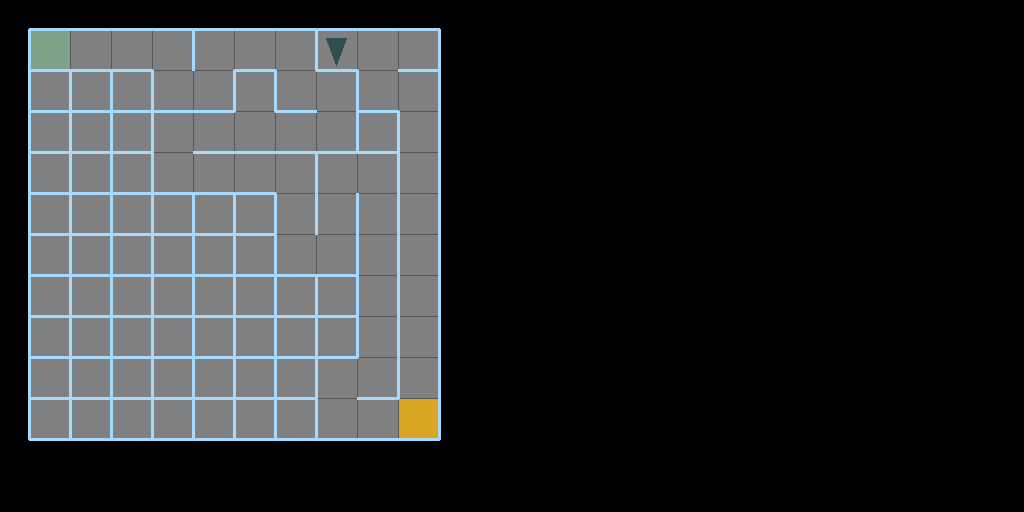

In [420]:
b.maze.printmaze()

In [428]:
for row in b.maze.mazecells:
    for c in row:
        print(c.visited)

1
1
1
1
1
1
1
1
1
1
13
1
1
0
1
1
1
1
1
1
21
13
1
1
1
1
3
2
2
1
16
19
1
1
1
1
3
4
1
1
19
20
17
12
14
26
6
5
1
1
16
21
11
20
14
18
7
6
10
6
36
27
25
14
33
32
30
8
9
9
42
14
20
38
40
20
20
11
12
8
54
41
39
38
46
17
19
9
9
9
43
56
49
48
116
46
10
10
10
9


In [417]:
b.maze.mazecells[9][0].directions

{'top': True, 'bottom': True, 'left': True, 'right': True}

In [418]:
b.maze.mazecells[9][1].directions

{'top': True, 'bottom': False, 'left': False, 'right': True}